# CRISP-DM: 

## 2. Data Understanding: 

#### Trois étapes spécifiques:
- La carte d'identité de la dataset(s)
- La description des champs
- L'analyse statistique de chaque champ



*La phase de compréhension des données est une phase d'analyse et non de modifications* 

*(seules les modifications acceptables sont liés au chargement, formattage - séparateurs décimal ou à la modification du type de données)*



In [2]:
import pandas as pd

In [71]:
df = pd.read_csv("./iris (1).csv")

In [72]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 1. Carte d'identité de la dataset: Informations globales sur la dataset:

- Nom de la dataset 
- Sa provenance: la source des données (base de données, fichier plat...) et la date d'extraction
- Sa taille: nombre d'enregistrements, d'attributs, poids du fichier
- Son formatage: structure du fichier pour faciliter son chargement
- La description métier des données: information capitale pour comprendre à quoi correspondent les données et le lien avec le problème à résoudre


In [73]:
df.shape

(150, 6)

- **Name:** Iris.csv
- **Origin:** The dataset dates from 1936 
- **Database size:** 150 rows, 6 columns, 4 KB
- **Format:** CSV file 
- **Description:** The dataset represents 50 flowers, each with represented by 4 measures: width / length of sepals and width / length of petals

### 2. Description des champs: 

Décrire chaque champ / colonnes - sous forme de tableau - pour comprendre exactement chauqe variable et son snes 

Information à fournir pour chaque colonnes: 
- Nom
- Type: entier, réel, chaîne de caractère, date
- Format: dates p.ex: JJ/MM, MM/JJ
- Description: expliquer ce que cette variable indique
- Unité: p.ex: température eau liquide en degré (entre 0 et 100 degré)
- Présence de données manquantes
- Limites attendues


In [74]:
# Check for the entire dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [75]:
# Columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, Species
print("Type:",df["Id"].dtype)
print("Num missing values:",df["Id"].isnull().sum())

Type: int64
Num missing values: 0


In [76]:
import pandas as pd

data = {'Name':['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',"PetalWidthCm","Species"],
        'Type':["int64","float64","float64","float64","float64","object"],
        'Format':["-","-","-","-","-","-"],
        'Description':["Identifiant","Longueur de la sépale", "Largeur de la sépale", "Longueur de la pétale","Largeur de la pétale","espère de fleur"],
        'Unité':["-","-","-","-","-","-"],
        'Données manquantes':[0,0,0,0,0,0],
        'Limite attendue':["-","-","-","-","-","-"],
       }

df_table = pd.DataFrame(data)
df_table

,Name,Type,Format,Description,Unité,Données manquantes,Limite attendue
0,Id,int64,-,Identifiant,-,0,-
1,SepalLengthCm,float64,-,Longueur de la sépale,-,0,-
2,SepalWidthCm,float64,-,Largeur de la sépale,-,0,-
3,PetalLengthCm,float64,-,Longueur de la pétale,-,0,-
4,PetalWidthCm,float64,-,Largeur de la pétale,-,0,-
5,Species,object,-,espère de fleur,-,0,-


### 3. Gestion des types:

Le type peut être déterminé par l'attribut dtypes - il est possible de changer le types des colomnes

Pandas comprends les types suivants: 
- int, float, bool timedelta64[ns], datetime64[ns]
- datetime64, period: fuseaux horaires
- category: pour les données catégorielles
- sparse: pour les données possédant de nombreuses valeurs vides
- interval: pour les intervalles
- Int8, Int16, Int32, Int64, UInt8, UInt16, UInt32, UInt64: entiers pouvant avoir des valeurs nulles, utilies en cas de données manquantes
- string: pour les chaînes de caractères
- boolean: pour les booléens (Vrai / Faux)

In [77]:
# Dans notre cas, nous pouvons changer le type de object à category pour les espèces
df['Species'] = df['Species'].astype('category')
df.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [78]:
# Utilisation d'une variable comme identifiant (ici la variable Id)
df = df.set_index("Id")

In [79]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


### 4. Détection de données manquantes: 

Pour voir combien de données manquent dans la dataset, il est possible de trouver le nombre de valeurs pour chaque champs, si le nombre est différent pour un champ alors il y a des données manquantes

In [85]:
# Les deux fonctions donnent le même résultat 
# df.count() 
# df.isna().sum()

### 5. Statistiques descriptives sur les champs: 

Cette analyse permettra une compréhension plus fine des données, ce qui amènera à des choix plus éclairés sur la préparation à faire avant la modélisation. 

#### 5.1 Types de données: 

Cette analyse permettra une compréhension plus fine des données, ce qui amènera à des choix plus éclairés sur la préparation à faire avant la modélisation.

**4 types de données:**
- Variables catégorielles: chaque valeur représente une catégorie
    - Nominales: il n'y a pas d'ordre spécifique entre les catégories
    - Ordinales: les variables suivent un ordre
- Variables numériques: chaque valeur est un nombre
    - Continues: toutes les valeurs sont potentiellement acceptables (variables réelles)
    - Discrètes: seules certaines valeurs (entières également) sont autorisées
    
Pour chaque variable, il faut produire deux informations:
- Une analyse statistique, sous forme textuelle ou tabulaire
- Une visualisation des données

#### 5.2 Analyse des données numériques: 

Les données numériques sont les plus classiques en statistiques - cei permet de définir des indicateurs de tendance centrale et de dispersion

- Indicateurs de tendance centrale = moyenne et médiane ==> permettent de savoir où se trouvent les données dans l'espace des possibles
- Indicateurs de dispersion = minimum, maximum, ecart-type, variance, différents quantiles ==> aider à mieux comprendre la répartition des données 


*Ecart-type: L’écart-type est une statistique qui permet de déterminer à quelle distance de la moyenne se trouve un groupe de nombres, en utilisant la racine carrée de la variance*

*Variance: La variance est la moyenne des carrés des différences par rapport à la moyenne. Pour déterminer la variance, il faut d’abord calculer la différence entre chaque point et la moyenne, puis élever au carré et faire la moyenne des résultats.*


In [86]:
df["SepalLengthCm"].mean()

5.843333333333334

In [87]:
df["SepalLengthCm"].median()

5.8

In [88]:
df["SepalLengthCm"].min()

4.3

In [89]:
df["SepalLengthCm"].max()

7.9

In [90]:
df["SepalLengthCm"].std() # écart type 

0.828066127977863

In [92]:
df["SepalLengthCm"].quantile(0.25)

5.1

In [93]:
# Marche aussi avec decribe
df["SepalLengthCm"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

#### 5.3 Graphiques sur les données numériques:

##### 5.3.1: Histogramme: 

Représente la distribution avec le nombre d'événements se trouvant dans chaque subdivision d'un axe. 

- bins: nombre de subdivisions à faire
- figsize: taille de la figure en largeur et hauteur (12,8)
- by: indication du champ catégoriel qui sera utilisé pour décomposer l'histogramme, généralement la variance cible

<AxesSubplot:>

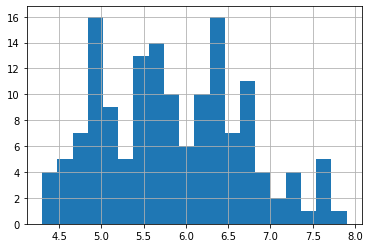

In [100]:
df["SepalLengthCm"].hist(bins=20)

array([[<AxesSubplot:title={'center':'Iris-setosa'}>,
        <AxesSubplot:title={'center':'Iris-versicolor'}>],
       [<AxesSubplot:title={'center':'Iris-virginica'}>, <AxesSubplot:>]],
      dtype=object)

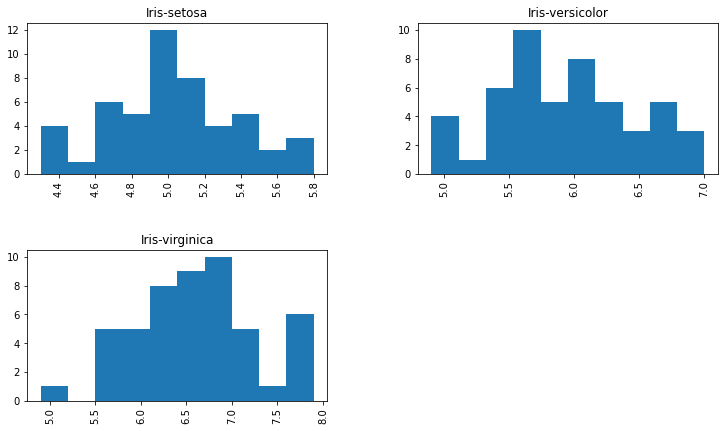

In [101]:
df["SepalLengthCm"].hist(by=df["Species"],figsize=(12,7))

##### 5.3.2: Nuage de points: 

Scatterplot: permet de voir toutes les données présentes dans un dataset, avec un point par ligne. 
- Ceci permet de voir les données aberrantes / des distributions particulières, et de mettre deux attributs en relation. 

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

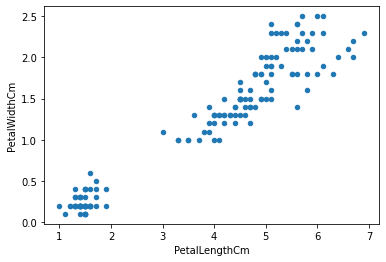

In [103]:
df.plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm")

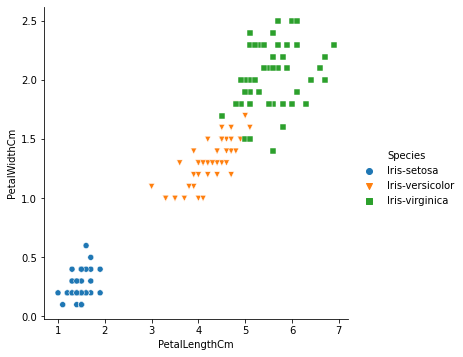

In [111]:
# %pip install seaborn

import seaborn as sns

sns.pairplot(df, x_vars="PetalLengthCm",
            y_vars="PetalWidthCm",height=5, hue='Species',markers=['o','v','s'])

# Il est possible de voir que la classe Setosa se détache des deux autres et est linéairement séparable. 
# Elle ne pose donc pas de problème pour un algorithme de ML. 
# Les deux autres sont dans une zone de superposition, leur séparation sera plus complexe. 


##### 5.3.3 Boîte à moustache - boxplot:

Permet de montrer graphiquement les indicateursde tendance centrale et de dispersion. Chaque distribution y est représenté par une boîte, horizontale ou verticale, dont sortent des "moustaches" pour indiquer les valeurs extrêmes. 

La "boîte" représente l'espace interquartile et va donc de Q1 (premier quartile soit 25%) à Q3 (troisième quartile soit 75%). La barre verticale à l'intérieur représente la médiane (ou Q2). 

Les moustaches indiquent l'étendue des données de chaque côté, jusqu'à la valeur minimale ou maxiale. 

<AxesSubplot:>

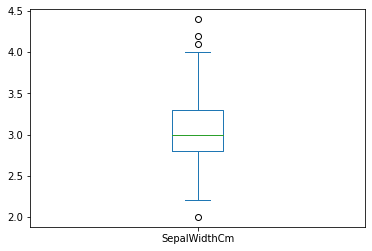

In [114]:
df["SepalWidthCm"].plot.box()
# Ceci permet de voir que l'écart-type est très important avec des données extrêmes des deux côtés mais aussi 
# que cette distribution est symétrique autour de la valeur centrale 

<AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='Species'>

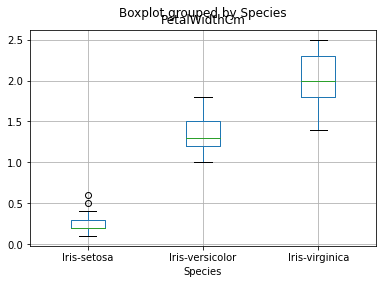

In [119]:
df.boxplot(column="PetalWidthCm",by="Species")


##### 5.3.4 Analyse sur les données catégorielles:

Permet de voir les distributions uniformes entre les différentes modalités (classes). Le principale indicateur de tendance est le mode, c'est-à-dire la modalité la plus représentée. Au niveau de la distribution, c'est le nombre de valeurs par modalité qui sera calculé. 

Deux méthodes utilisables: 

-  describe(): informations globales dont le mode et le nombre de valeurs
-  value_counts(): donne le compte par valeur

In [120]:
df["Species"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [121]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### 5.5 Graphiques sur les données catégorielles: 

Principaux graphiques sont les diagrammes à barres et les diagrammes circulaires. 

<AxesSubplot:>

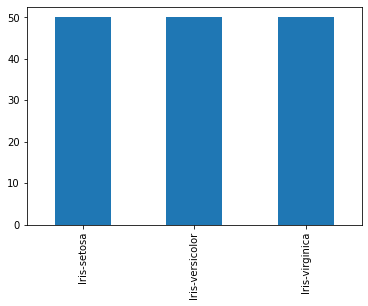

In [122]:
df["Species"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Species'>

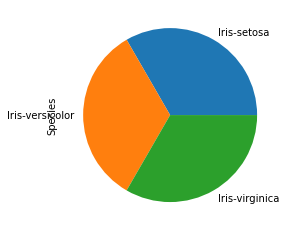

In [123]:
df["Species"].value_counts().plot(kind="pie")

#### 5.6 Analyse croisée des données: 

Lien entre les données, voir si certaines impactent d'autres. Le lien potentiel entre les variables explicatives et les variables cibles. 

##### 5.6.1: Entre des variables numériques:

Pour déterminer le lien entre des variables numériques, il est possible d'utiliser les coefficients de corrélation. Ceux-ci vont de -1 à 1. Plus proche de 1 = forte corrélation (lien fort entre les variables) et plus proche de 0 = aucun lien entre les deux variables.

- corr: calcule tous les coefficients de corrélation entre les variables deux à deux et les présente dans un Dataframe
- corrwith: permet d'obtenir tous les coefficients de corrélation des variables envers une particulière. 

Il s'uffit d'ajouter la fonction abs si seule la valeur absolue est intéressante. 

In [124]:
df.corr()
# Il existe une très forte corrélation positive entre la longueur et la largeur de la pétale. 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [125]:
df.corrwith(df["SepalLengthCm"]).abs()
# Mais il existe aucun lien entre la largeur et la longueur de la sépale (11%)
# La longueur de la sépale étant plus en lien avec la longueur de la sépale (87%)

SepalLengthCm    1.000000
SepalWidthCm     0.109369
PetalLengthCm    0.871754
PetalWidthCm     0.817954
dtype: float64

##### 5.6.2: Entre des variables numériques et une variable catégorielle:

Pour comparer des variables numériques face à une variable catégorielle nous pouvons calculer les différents indicateurs statistiques. 
- groupby: permet de regroupper les données avant d'y appliquer describe

In [126]:
# L'analyse de la longueur des sépales en fonction des classes se fait grâce à la ligne suivane. 
# Le résultat a été transposé pour le rendre plus facile à lire:
df.groupby('Species')["SepalLengthCm"].describe().transpose()

Species,Iris-setosa,Iris-versicolor,Iris-virginica
count,50.00000,50.000000,50.00000
mean,5.00600,5.936000,6.58800
std,0.35249,0.516171,0.63588
min,4.30000,4.900000,4.90000
25%,4.80000,5.600000,6.22500
50%,5.00000,5.900000,6.50000
75%,5.20000,6.300000,6.90000
max,5.80000,7.000000,7.90000


##### 5.6.3: Entre des variables catégorielles: 

Analyse le comptage par catégogrie (groupby) avant de demander les comptages avec value_counts. 

Exemple: titanic.groupby('Survived')["Embarked"].value_counts() ==> compte par catégorie d'embarquement, ceux qui ont survecu ou non
Exemple: titanic.groupby('Embarked')['Survived'].value_counts(normalize=True)
Exemple: pd.crosstab(titanic['Survived'],titanic['Embarked'])